<a href="https://colab.research.google.com/github/SnooperAlex/Big-Data-and-Machine-Learning/blob/main/SVM_NN_CNN_852258.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.decomposition import PCA
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
import numpy as np
import matplotlib
from sklearn.linear_model import LinearRegression
plt = matplotlib.pyplot

In [ ]:
wine_data = np.load('./wineData.npy')
wine_labels = np.load('./wineLabels.npy')


train_data, test_data, train_labels, test_labels = train_test_split(wine_data, wine_labels, train_size = 0.8)

In [ ]:
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [ ]:
from sklearn.svm import SVC

1.0


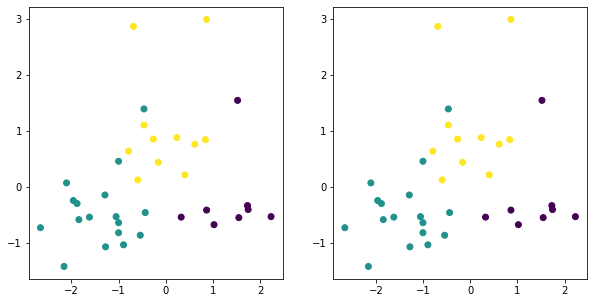

In [ ]:
model = SVC(C = 1, kernel = 'rbf')
model.fit(train_data, train_labels)

predicted = model.predict(test_data)
scoring = model.score(test_data, test_labels)
print(scoring)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
ax[0].scatter(test_data[:,0], test_data[:,1], c = test_labels)

ax[1].scatter(test_data[:,0], test_data[:,1], c = predicted)

Task 4.2


In [ ]:
model1 = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(4, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(train_labels)), activation=tf.nn.softmax)])

In [ ]:
model1.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

In [ ]:
history = model1.fit(train_data, train_labels, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
4/4 [==============================] - 1s 75ms/step - loss: 1.6426 - sparse_categorical_accuracy: 0.2566 - val_loss: 1.4590 - val_sparse_categorical_accuracy: 0.2759
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 1.5435 - sparse_categorical_accuracy: 0.2389 - val_loss: 1.3936 - val_sparse_categorical_accuracy: 0.2759
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 1.4699 - sparse_categorical_accuracy: 0.2389 - val_loss: 1.3394 - val_sparse_categorical_accuracy: 0.2759
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 1.4093 - sparse_categorical_accuracy: 0.2920 - val_loss: 1.2939 - val_sparse_categorical_accuracy: 0.3103
Epoch 5/100
4/4 [==============================] - 0s 13ms/step - loss: 1.3578 - sparse_categorical_accuracy: 0.2478 - val_loss: 1.2532 - val_sparse_categorical_accuracy: 0.3448
Epoch 6/100
4/4 [==============================] - 0s 14ms/step - loss: 1.3125 - sparse_categorical_accuracy: 

2/2 [==============================] - 0s 8ms/step


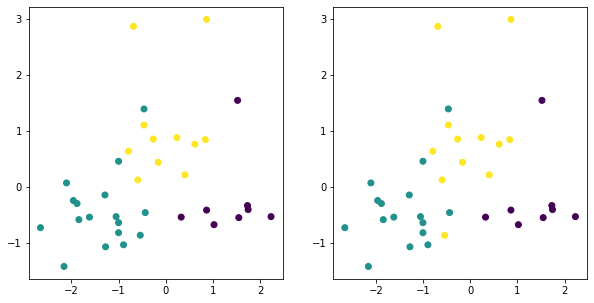

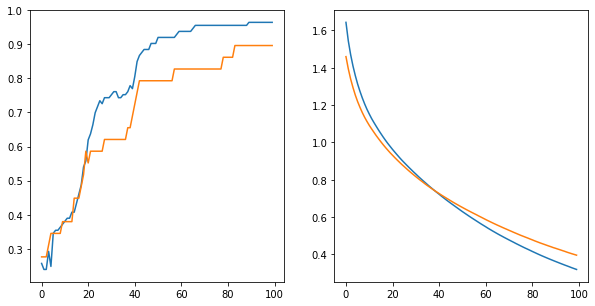

In [ ]:

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
ax[0].scatter(test_data[:,0], test_data[:,1], c = test_labels)

predictLabels = np.argmax(model1.predict(test_data), axis = 1)
ax[1].scatter(test_data[:,0], test_data[:,1], c = predictLabels)

plt.figure(figsize = [10, 5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


Task 4.3

In [ ]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
np.shape(train_data[0])

NameError: ignored

In [ ]:
train_data = np.reshape(train_data, (60000, 784))/255
test_data = np.reshape(test_data, (10000, 784))/255

In [ ]:
model1 = tf.keras.models.Sequential(layers=[
    tf.keras.layers.Dense(3, activation=tf.nn.relu),
    tf.keras.layers.Dense(9, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(test_labels)), activation=tf.nn.softmax)])

model1.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

history = model1.fit(train_data, train_labels, epochs=40, validation_split=0.2, verbose=1)
loss, accuracy = model1.evaluate(test_data, test_labels)

Epoch 1/40
1500/1500 [==============================] - 6s 4ms/step - loss: 1.8044 - sparse_categorical_accuracy: 0.3867 - val_loss: 1.2515 - val_sparse_categorical_accuracy: 0.5826
Epoch 2/40
1500/1500 [==============================] - 4s 3ms/step - loss: 1.1416 - sparse_categorical_accuracy: 0.6232 - val_loss: 1.0255 - val_sparse_categorical_accuracy: 0.6802
Epoch 3/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9723 - sparse_categorical_accuracy: 0.6935 - val_loss: 0.9178 - val_sparse_categorical_accuracy: 0.7200
Epoch 4/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9008 - sparse_categorical_accuracy: 0.7193 - val_loss: 0.8663 - val_sparse_categorical_accuracy: 0.7352
Epoch 5/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8602 - sparse_categorical_accuracy: 0.7344 - val_loss: 0.8414 - val_sparse_categorical_accuracy: 0.7411
Epoch 6/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8273 - spars

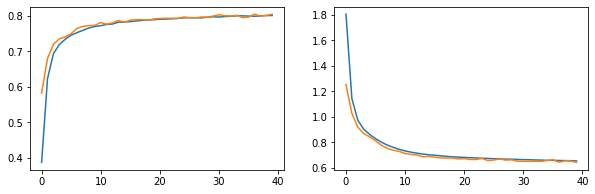

In [ ]:
plt.figure(figsize = [10, 3])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.show()

Task 4.4

In [ ]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()

In [ ]:
train_data = np.expand_dims(train_data, -1)/255
test_data = np.expand_dims(test_data, -1)/255

train_data.shape

NameError: ignored

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(np.unique(test_labels)), activation = "softmax"),
])

model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

history = model.fit(train_data, train_labels, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 39s 25ms/step - loss: 0.9809 - sparse_categorical_accuracy: 0.6784 - val_loss: 0.2321 - val_sparse_categorical_accuracy: 0.9360
Epoch 2/10
1500/1500 [==============================] - 35s 23ms/step - loss: 0.2806 - sparse_categorical_accuracy: 0.9161 - val_loss: 0.1505 - val_sparse_categorical_accuracy: 0.9580
Epoch 3/10
1500/1500 [==============================] - 34s 22ms/step - loss: 0.2118 - sparse_categorical_accuracy: 0.9360 - val_loss: 0.1206 - val_sparse_categorical_accuracy: 0.9661
Epoch 4/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.1781 - sparse_categorical_accuracy: 0.9464 - val_loss: 0.1065 - val_sparse_categorical_accuracy: 0.9703
Epoch 5/10
1500/1500 [==============================] - 35s 23ms/step - loss: 0.1594 - sparse_categorical_accuracy: 0.9521 - val_loss: 0.0964 - val_sparse_categorical_accuracy: 0.9728
Epoch 6/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.

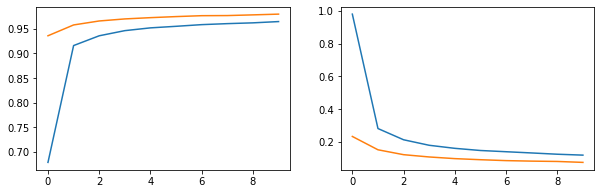

In [ ]:
plt.figure(figsize = [10, 3])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.show()